## Data Exploration

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import string

### General view of the dataset

In [102]:
df = pd.read_csv('spam_1.csv')

In [103]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [104]:
df.shape

(5572, 5)

There are `5572` data points and `5` columns: `v1`, `v2`, `Unnamed: 2`,	`Unnamed: 3`, `Unnamed: 4`


#### Drop `Unnamed: 2`,	`Unnamed: 3`, `Unnamed: 4` since they are irrelevant

In [105]:
# delete 3 unnamed columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

#### Rename `v1` to `Category` and `v2` to `Message`

In [106]:
df = df.rename(columns={"v1": "Label", "v2": "Message"})

In [107]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Check for missing values 

In [11]:
# check null
df.isnull().sum()

Category    0
Message     0
dtype: int64

#### Check for duplicates

In [91]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [92]:
df.shape

(5169, 2)

After dropping duplicates, the dataset goes from `5572` to `5169` rows

### Test with helper function

In [ ]:
# boom

## Data preprocessing

### Remove special character

#### Function to remove punctuation

In [15]:
# punctuation = string.punctuation
# def remove_punctuation(text):
#     return text.translate(str.maketrans('', '', punctuation))

In [16]:
# df["Message"] = df["Message"].apply(lambda text: remove_punctuation(text))
# df.head()

,Category,Message
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...


### Remove stopwords

#### Install `nltk` (Natural Language Toolkit) 

In [13]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [14]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Function to remove stopwords

In [17]:
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))

# def remove_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in stop_words])

In [18]:
# df["Message"] = df["Message"].apply(lambda text: remove_stopwords(text))
# df.head()

,Category,Message
0,ham,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor U c already say
4,ham,Nah I dont think goes usf lives around though


### Lemmatizing words

In [20]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Function to lemmatize the text

In [49]:
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet
# from nltk import pos_tag

# # pos_text: Part of speech, assign a tag to each token in a document to denote its part of speech

# wordnet_map = {"N":  wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}
# lemmatizer = WordNetLemmatizer()

# def lemmatize_words(text):
#     pos_text = pos_tag(text.split())
#     return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

In [50]:
# df["Message"] = df["Message"].apply(lambda text: lemmatize_words(text))
# df.head()

,Category,Message
0,ham,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor U c already say
4,ham,Nah I dont think go usf life around though


### Check label's distribution of target vector `Category` to determine whether unbalanced or not

<Axes: xlabel='Label', ylabel='count'>

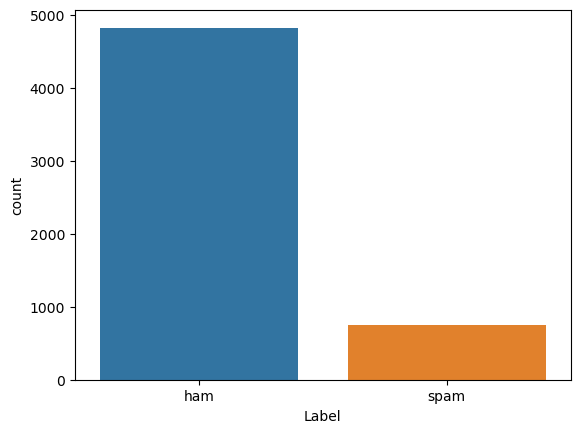

In [108]:
sns.countplot(x="Label", data=df)

In [109]:
df['Label'].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

The labels are unbalanced with **87%** are ham and **13%** are spam

## Split data

In [130]:
X = df['Message']
y = df['Label']

Since there's unbalanced in class lables, **stratified partitioning** will be used because it ensures that every partition preserves the same ratio of values for the prediction target as in the original data

In [132]:
from sklearn.model_selection import train_test_split

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [133]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4457,) (1115,) (4457,) (1115,)


## Training model

### Model implementation using text data using tf-idf

In [134]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np

# initialize tf-idf vectorizer
# tf = TfidfVectorizer()

lr = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5)

text_clf = Pipeline([('tf', TfidfVectorizer()), ('lr', lr)])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf', TfidfVectorizer()),
                ('lr',
                 LogisticRegression(l1_ratio=0.5, penalty='elasticnet',
                                    solver='saga'))])

In [137]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

train_preds = text_clf.predict(X_train)
score = accuracy_score(y_train, train_preds)
score

0.9667938074938299

In [48]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_extraction.text import TfidfVectorizer
# import numpy as np

# # initialize tf-idf vectorizer
# tf = TfidfVectorizer()

# # initialize LR model
# lr = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5)

# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# # initialize arrays to store predictions
# full_y_pred = np.empty((0,))
# full_holdout_pred = np.zeros(len(X_test))

# y_train_text = np.array(y_train)

# # tf-idf vectorized
# X_train_tf = tf.fit_transform(X_train)
# X_test_tf = tf.transform(X_test)

# # convert to array for easier
# X_train_tf_arr = np.array(X_train_tf)
# X_test_tf_arr = np.array(X_test_tf)


# create out-of-fold predictions for model stacking
# for fold, (train_index, test_index) in enumerate(kfold.split(X_train_tf)):
#     X_train_fold, X_test_fold = X_train_tf[train_index], X_train_tf[test_index]
#     y_train_fold, y_test_fold = y_train_text[train_index], y_train_text[test_index]
    
#     # fit model
#     lr.fit(X_train_fold, y_train_fold)
    
#     # make predictions on fold test and test sets
#     y_fold_pred = lr.predict(X_test_fold)
#     holdout_pred = lr.predict(X_test_tf)
    
#     # extend full_y_pred with fold predictions
#     full_y_pred = np.concatenate((full_y_pred, y_fold_pred))
    
#     # collect hold out predictions
#     full_holdout_pred += holdout_pred

,message
0,1.0
